Details of the Glasses:
The refractive index of the crown glass =  1.58913
The refractive index of the flint glass =  1.71736

Abbe number of the crown glass =  61.27
Abbe number of the flint glass =  29.62

n(F) - n(C) for the crown glass = 0.009615
n(F) - n(C) for the flint glass = 0.024219

The required power of the doublet (K) is = 6.666667 diopter

The power of the positive lens =  12.9057  diopter
The power of the negative lens =   -6.2391  diopter

The net curvature of the positive lens =  0.219064
The net curvature of the negative lens =  -0.086973

The curvature of the first surface =  0.109532 cm
The curvature of the second surface =  -0.109532 cm
The curvature of the third surface =  -0.022559 cm

The waist thickness of the positive lens =  0.209863  cm
The waist thickness of the negative lens =  0.2  cm

Power of the positive lens =  0.127634
Power of the negative lens =  -0.061988
Total effective power of the lens =  0.065645

Effective focal length =  15.23338 cm
Ratio = 

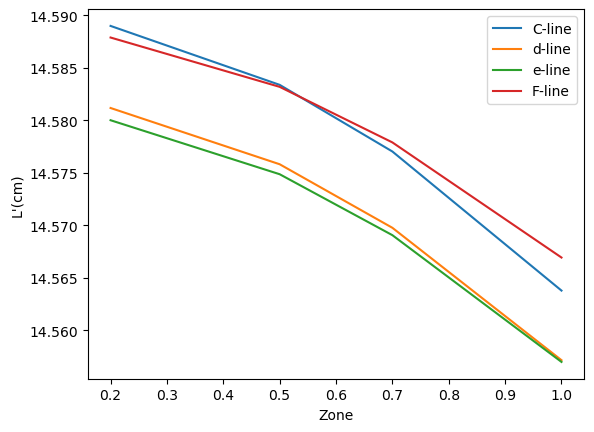

In [1]:
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
#refractive indices of glasses under different  wavelength of light
ref_indices_1 = [1.58619,1.58913,1.59142,1.595806]
ref_indices_2 = [1.71035,1.71736,1.72308,1.734569]
light = ['C','d','e','F']

ref_crown = 1.58913
ref_flint = 1.71736
abbe_crown =61.27
abbe_flint =29.62
V = abbe_crown - abbe_flint
deltaN1 = (ref_crown - 1)/ abbe_crown
deltaN2 = (ref_flint - 1)/ abbe_flint
print("Details of the Glasses:")
print("The refractive index of the crown glass = ",ref_crown)
print("The refractive index of the flint glass = ",ref_flint)
print("\nAbbe number of the crown glass = ",abbe_crown)
print("Abbe number of the flint glass = ",abbe_flint)
print("\nn(F) - n(C) for the crown glass =",round(deltaN1,6))
print("n(F) - n(C) for the flint glass =",round(deltaN2,6))

F=15 # Equivalent Focal Length in cm
K = 1/F
k = round(1/(F*10**(-2)),6)

print("\nThe required power of the doublet (K) is =",k,"diopter")

K_crown = (K * abbe_crown)/V
K_flint = (K * abbe_flint)/V
K1 = round(K_crown,6)
K2 = round(-K_flint,6)
C_crown = 1/(F*V*deltaN1)#curvature of the crown glass
C_flint = -1/(F*V*deltaN2)#curvature of the flint glass

print("\nThe power of the positive lens = ",round(100 * K1,6)," diopter")
print("The power of the negative lens =  ",round(100 * K2,6)," diopter")
print("\nThe net curvature of the positive lens = ",round(C_crown,6))
print("The net curvature of the negative lens = ",round(C_flint,6))

C1 = C_crown/2 #curvature of the first surface
C2 = -C1 #curvature of the second surface
C3 = C2 - C_flint #curvature of the last surface

print("\nThe curvature of the first surface = ",round(C1,6),"cm")
print("The curvature of the second surface = ",round(C2,6),"cm")
print("The curvature of the third surface = ",round(C3,6),"cm")


D=2# Diameter of the lens in Cm
e=1 #Edge thickness of the positive lens in mm
d2=2 # waist thickness of the negative lens in mm
d1 = (e/10) + 2*((1/C1) - math.sqrt(((1/C1)**2 - 1))) #this is the waist thickness of the positive lens
d_2 = d2/10 # waist thickness of the negative lens in cm

print("\nThe waist thickness of the positive lens = ",round(d1,6)," cm")
print("The waist thickness of the negative lens = ",round(d_2,6)," cm")

K_1 = (ref_indices_1[1]-1)*((C1-C2) + (ref_indices_1[1]-1/ref_indices_1[1]) * d1 * C1*C2)
K_2 = (ref_indices_2[1]-1)*((C2-C3) + (ref_indices_2[1]-1/ref_indices_2[1]) * d_2 * C2*C3)
K_ = K_1 + K_2
F_ = 1/K_ #calculated effective focal length

print("\nPower of the positive lens = ",round(K_1,6))
print("Power of the negative lens = ",round(K_2,6))
print("Total effective power of the lens = ",round(K_,6))
print("\nEffective focal length = ",round(F_,6),"cm")

ratio=F/F_

print("Ratio = ",round(ratio,6))

C1_ = round(C1 / ratio,6)
C2_ = round(C2 / ratio,6)
C3_ = round(C3 / ratio,6)
d1_ = round(d1 * ratio,6)
d2_ = round(d_2 * ratio,6)

print("\nNormalised curvature of first surface = ",C1_,"cm")
print("Normalised curvature of second surface = ",C2_,"cm")
print("Normalised curvature of third surface = ",C3_,"cm")
print("Normalised waist thickness of positive lens = ",d1_,"cm")
print("Normalised waist thickness of negative lens = ",d2_,"cm")


#Paraxial ray tracing by Y-nu method:--
print("\nResult from y-nu method:--")

Curvatures = [C1_,C2_,C3_]
Thickness = [d1_,d2_]
n=1
for j in range(4):
 refractive_index = [n,ref_indices_1[j],ref_indices_2[j],n]
 powers = []
 u = [0]
 height = [0.2]
 n1u11 = []
 for i in range(3):
  power = (refractive_index[i+1]-refractive_index[i])*Curvatures[i]
  powers.append(power)
 for i in range(3):
  n1u1 = refractive_index[i] * u[i] + height[i] * powers[i]
  n1u11.append(n1u1)
  u.append(n1u1/refractive_index[i+1])
  if i<2:
   y = height[i] + (-Thickness[i] / refractive_index[i + 1]) * n1u11[i]
   height.append(y)

  # print(n1u11)
 l1 = (height[2] / n1u11[2])

 print("The",light[j],"light Image Distance (l') = ",round(l1,6), "cm")



 #Paraxial ray tracing by Qu method :--
print("Result from Qu method:--")
q=[0.2,0.5,0.7,1.0]
C=[]
d=[]
e=[]
f=[]
for m in range(len(q)):
 Q = [q[m]]

 for k in range(len(ref_indices_1)):
  Refractive_index = [n, ref_indices_1[k], ref_indices_2[k], n]
  Q2 = []
  Ud = [0]
  I = []
  Id = []
  for l in range(3):
     x = Q[l] * Curvatures[l] - (math.sin(Ud[l]))


     I_ = math.asin(x)
     I.append(I_)

     y = (Refractive_index[l] / Refractive_index[l + 1]) * x

     Id_ = math.asin(y)
     Id.append(Id_)


     Ud_ = Ud[l] + I[l] - Id[l]
     Ud.append(Ud_)


     Qd_ = (math.sin(Ud[l + 1]) + math.sin(Id[l])) / Curvatures[l]

     if l<2:

      Q2 = Qd_ - Thickness[l] * math.sin(Ud[l + 1])
      Q.append(Q2)

     if l==2:
      Q.append(Qd_)



  L = (Q[3] / math.sin(Ud[3]))


#print("\n FOR ",q[m]," ZONE")
#1print("\n For ",light[k]," light : Image Distance L = ",round(L,6))

  if k==0:
   C.append(round(L,6))
  if k == 1:
   d.append(round(L, 6))
  if k == 2:
   e.append(round(L, 6))
  if k == 3:
   f.append(round(L, 6))
print("\n")
print("Table for (L'):--")
result =[['line','zone-0.2','zone-0.5','zone-0.7','zone-1.0'],
          ['C-line',C[0],C[1],C[2],C[3]],
['d-line',d[0],d[1],d[2],d[3]],
['e-line',e[0],e[1],e[2],e[3]],
['F-line',f[0],f[1],f[2],f[3]]]
print(tabulate(result, headers = "firstrow", tablefmt="grid", floatfmt=".3f"))
print("\n")


print("Plot of (Zone,L'):-- ")
plt.plot(q,C, label = 'C-line')
plt.plot(q,d, label = 'd-line')
plt.plot(q,e, label = 'e-line')
plt.plot(q,f, label = 'F-line')
plt.xlabel('Zone')
plt.ylabel("L'(cm)")
plt.legend()
plt.show()
